In [1]:
import matplotlib.pyplot   as plt
import numpy               as np
import matplotlib.colors   as colors
import scipy.ndimage       as ndimage
import auxiliar as aux
import calculus as calc

def par(n=10):
    plt.rcParams['mathtext.fontset']    = 'custom'
    plt.rcParams['mathtext.rm']         = 'Bitstream Vera Sans'
    plt.rcParams['mathtext.it']         = 'Bitstream Vera Sans:italic'
    plt.rcParams['mathtext.bf']         = 'Bitstream Vera Sans:bold'
    plt.rcParams['mathtext.fontset']    = 'stix'
    plt.rcParams['figure.facecolor']    = 'w'
    plt.rcParams['figure.dpi']          = 200
    plt.rcParams['savefig.dpi']         = 200
    plt.rcParams['savefig.format']      = 'pdf'
    plt.rcParams['savefig.transparent'] = True
    plt.rcParams['figure.dpi']          = 100
    plt.rcParams['axes.prop_cycle']     = plt.cycler(color=[
    'darkblue','darkviolet','deeppink','crimson','orangered','darkorange','sandybrown','gold','yellow'])
    plt.rcParams.update({"font.size": n})

# Plot the measurement results

Number of runs : 4
Number of runs : 409


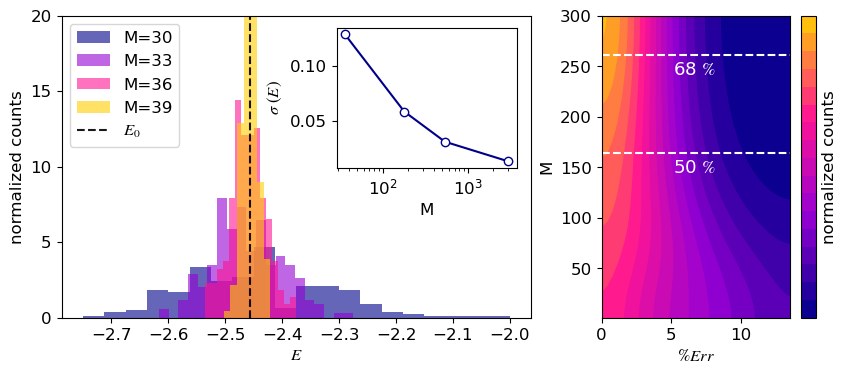

In [3]:
graphs = 'path_graphics'
data   = 'path_data'

color = ['darkblue','darkviolet','deeppink',(1, 206/255, 0)]
cmap  = colors.LinearSegmentedColormap.from_list('', color)
bins  = [20,20,15,7]


# measures array
Mdisc = np.array([12, 60, 180, 1000])*3
Mcont = np.array([i+10 for i in range(91)])*3

# data of runs discrete
a  = aux.readData('measure_discrete',data)
# mean E of each run
Em = [np.mean(a[i][1]) for i in range(len(a))]
# std of each run
Es = [np.std(a[i][1]) for i in range(len(a))]

# exact calculus
psi5,E05,E15 = calc.exact_sol(5)
psi4,E04,E14 = calc.exact_sol(4)

# data of runs cntinuous
b  = aux.readData('measure_continue',data)
# we only get the data for N=4
b  = [b[i] for i in range(len(b)) if b[i][-1][-1]==4]
# mean energy of each run
bE = [abs(np.mean(b[i][1])-E04)/abs(E04)*100 for i in range(len(b))]
# all energy and all measures
E4 = [b[i][1][j] for i in range(len(b)) for j in range(len(b[i][1]))]
m4 = [b[i][0][j]*3 for i in range(len(b)) for j in range(len(b[i][1]))]
# calculated error
e4 = [abs((E4[i]-E04)/E04)*100 for i in range(len(E4))] 

#histogram data
counts,ybins,xbins,image =plt.hist2d(e4,m4,bins=(40,40),range=((0,13.5),(1,300)))
plt.close()
Z = counts.transpose()
Z = ndimage.gaussian_filter(Z, sigma=7, order=0)



par(12)
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [4, 2]})

# ax1 left-------------------------------------
for i in range(len(a)):
    ax1.hist(a[i][1],bins=bins[i],density=True,color=color[i],alpha=0.6,histtype='stepfilled',label='M='+str(3*int(b[i][0][0])))

ax1.axvline(E05,color='k',linestyle='--',label='$E_0$',lw=1.5,alpha=0.9)

ax1.set_ylim(0,20)
ax1.legend(loc=2)
ax1.set_xlabel('$E$')
ax1.set_ylabel('normalized counts')
ax1.set_yticks([0,5,10,15,20])

# ax2 subplot-------------------------------
left, bottom, width, height = [0.4, 0.5, 0.18, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(Mdisc,Es,'-',color='darkblue',marker='o',markerfacecolor='white')

ax2.set_xscale('log')
ax2.set_xlabel('M')
ax2.set_ylabel('$\sigma \ (E)$')


# ax3 right----------------------------------
# contourf
cont = ax3.contourf(Z,extent=[ybins[0],ybins[-1],xbins[0],xbins[-1]], cmap = cmap, levels = 16)
plt.colorbar(cont,label='normalized counts',ax=ax3,ticks=[])

# % lines
ax3.axhline(164.3,color='w',linestyle='--')
ax3.text(6.7,164.3-15,'50 $\%$',fontsize=13,ha='center',va='center',color='white')
ax3.axhline(261.3,color='w',linestyle='--')
ax3.text(6.7,261.3-15,'68 $\%$',fontsize=13,ha='center',va='center',color='white')

for c in cont.collections:
    c.set_edgecolor("face")
ax3.set_xlabel('$\%Err$')
ax3.set_ylabel('M')


plt.savefig(graphs+'/measuringN=5.pdf',format='pdf',bbox_inches='tight')
plt.show()